In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('student.csv', sep=';')

### 2.a Dataset Shape
as we can see, the shape of the data is (649, 33) meaning that we have 649 rows of data with 33 values (or columns) for each data row

In [4]:
dataset.shape

(649, 33)

to find the missing data, we first try the `isna()` method of the data frame to see if there are any missing data.

In [5]:
dataset.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

we can see there is no nan value in any of the columns. to be sure, we print the unique values of each column and we can check the result with the read-me file that comes with the data or see if there is any strange values in them.

In [6]:
dataset.apply(lambda z: z.unique(), axis=0)

school                                                 [GP, MS]
sex                                                      [F, M]
age                            [18, 17, 15, 16, 19, 22, 20, 21]
address                                                  [U, R]
famsize                                              [GT3, LE3]
Pstatus                                                  [A, T]
Medu                                            [4, 1, 3, 2, 0]
Fedu                                            [4, 1, 2, 3, 0]
Mjob                [at_home, health, other, services, teacher]
Fjob                [teacher, other, services, health, at_home]
reason                        [course, other, home, reputation]
guardian                                [mother, father, other]
traveltime                                         [2, 1, 3, 4]
studytime                                          [2, 3, 1, 4]
failures                                           [0, 3, 1, 2]
schoolsup                               

we can see that all values in all columns are normal. at this point, we can say that there is no missing data in this dataset.

### 2.b Histogram

array([[<AxesSubplot:title={'center':'G1'}>,
        <AxesSubplot:title={'center':'G2'}>],
       [<AxesSubplot:title={'center':'G3'}>, <AxesSubplot:>]],
      dtype=object)

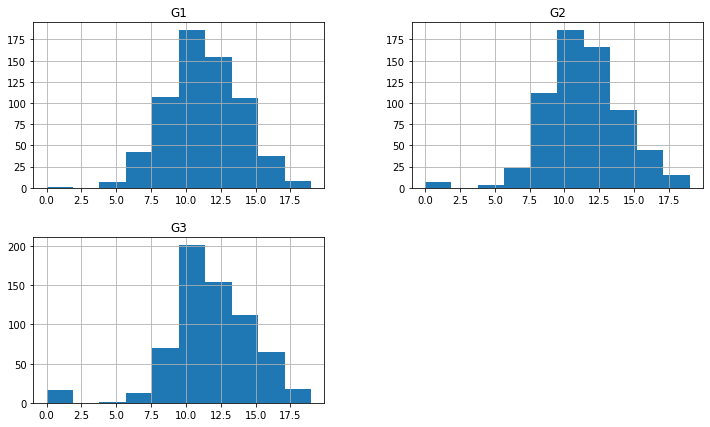

In [7]:
dataset[['G1', 'G2', 'G3']].hist(figsize=(12, 7))


<AxesSubplot:ylabel='Frequency'>

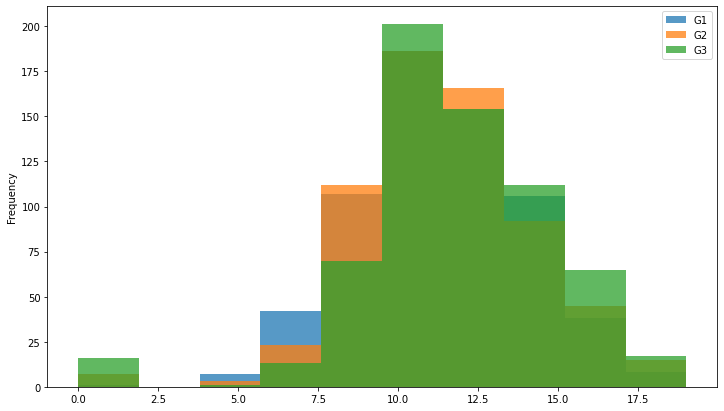

In [8]:
dataset[['G1', 'G2', 'G3']].plot.hist(figsize=(12, 7), alpha=0.75)

### 2.c

In [9]:
dataset['Grade'] = dataset[['G1', 'G2', 'G3']].mean(axis=1)

### 2.d

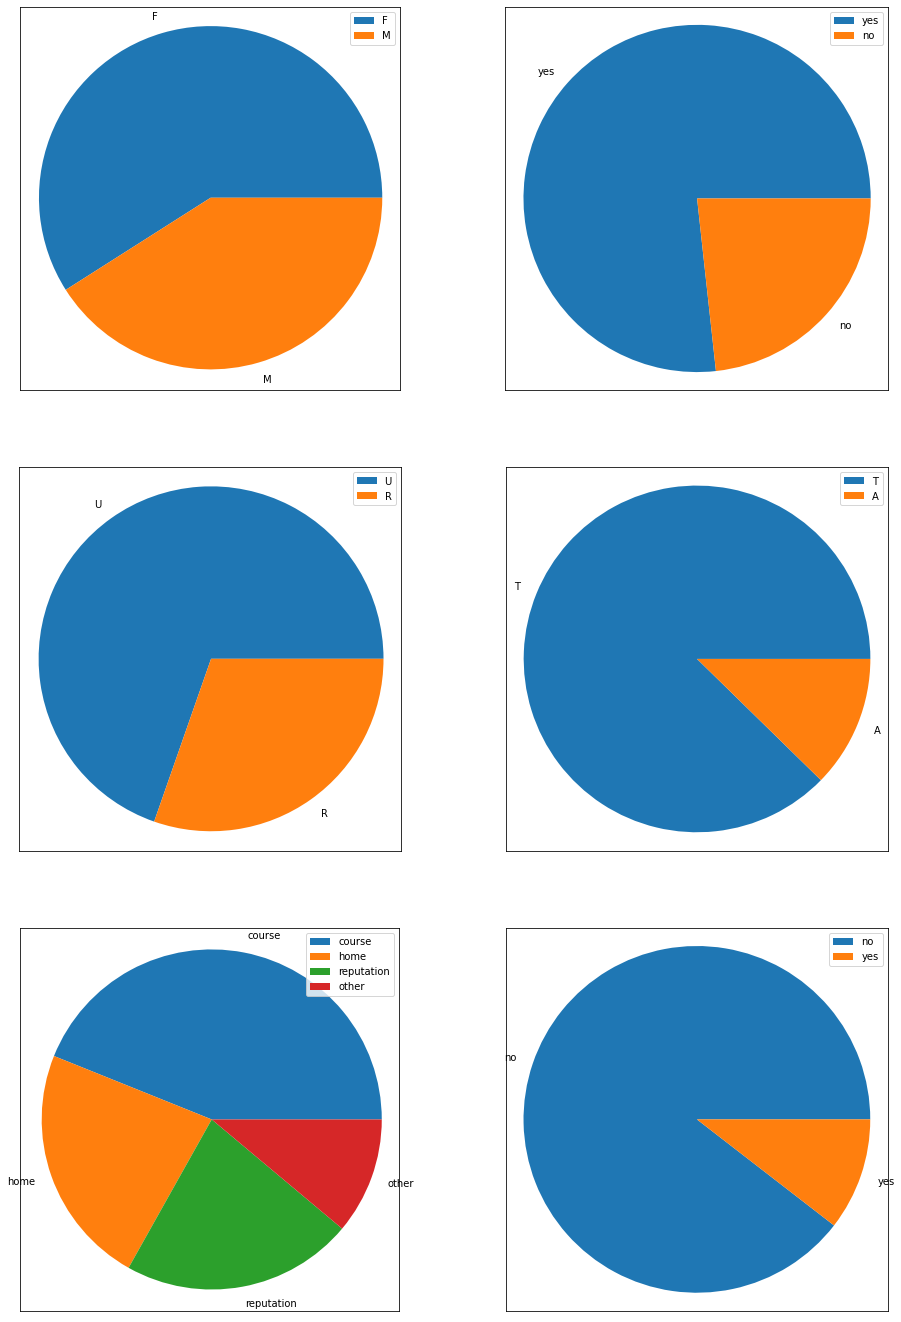

In [10]:
fig, ax = plt.subplots(3, 2, figsize=(2*8, 3*8))
fig.set_facecolor('w')
for i, column in enumerate(['sex', 'internet', 'address', 'Pstatus', 'reason', 'schoolsup']):
    data = dataset[column].value_counts()
    ax[i // 2][i % 2].pie(data, labels=data.index, frame=True)
    ax[i // 2][i % 2].set_xticks([])
    ax[i // 2][i % 2].set_yticks([])
    ax[i // 2][i % 2].legend()

### 2.e

<AxesSubplot:xlabel='sex', ylabel='Grade'>

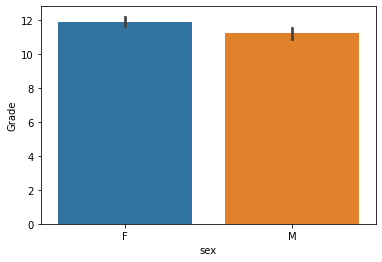

In [19]:
data = dataset[['sex', 'Grade']]
sns.barplot(data=data, x='sex', y='Grade')

we can see that females tend to get better grades.

### 2.f

<AxesSubplot:xlabel='health', ylabel='Grade'>

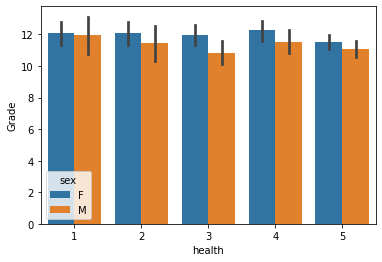

In [23]:
data = dataset[['sex', 'health', 'Grade']]
sns.barplot(data=data, x='health', y='Grade', hue='sex')

we can see tha in all health groups, females tend to have higher grades. Also, with higher health groups, we can see that the grades are not very different, this suggests that health is not a good measurement of grade and health and grade are not correlated.

### 2.g

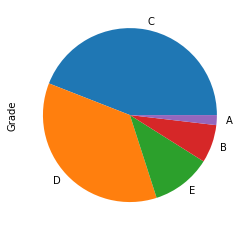

In [37]:
grade_bins = pd.cut(dataset['Grade'], 5, labels=['A', 'B', 'C', 'D', 'E'])
grade_bins.value_counts().plot.pie().get_figure().set_facecolor('w')

### 2.h

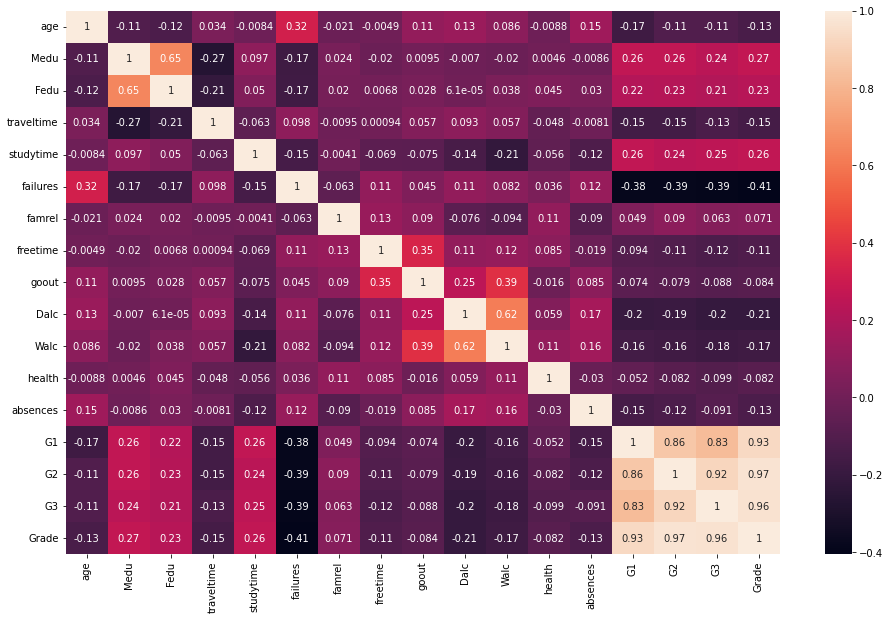

In [44]:
fig, ax = plt.subplots()
sns.heatmap(dataset.corr(), ax=ax, annot=True)
fig.set_size_inches((16, 10))

we can see that G1, G2, G3 have the highest correlation with each other.